In [1]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load in the data
#box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
#rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
#rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
#title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
#title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Question 1: Average voter rating and popularity vs gross
## Merge important dataframes

In [3]:
# rename column key in movie_budgets to match key in tmdb_movies
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)

In [4]:
# create new dataframe and assign it to the merging of tmdb_movies and movie_budgets
movie_financials_and_popularity = pd.merge(movie_budgets, tmdb_movies, on='title') # use title as merging key

In [5]:
# drop duplicated or irrelevant columns
movie_financials_and_popularity.drop(columns=['genre_ids', 'original_title', 'id_x',
                                              'original_language', 'release_date_y', 'Unnamed: 0'], inplace=True)
movie_financials_and_popularity.rename(columns={'release_date_x': 'release_date'}, inplace=True)
movie_financials_and_popularity.head() # print dataframe to check that merging and dropping worked correctly

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",141052,34.953,6.2,7510


## Clean data to get money values to integers

In [6]:
# call function made to clean data
money_values_to_integer(movie_financials_and_popularity, 'production_budget')
money_values_to_integer(movie_financials_and_popularity, 'domestic_gross')
money_values_to_integer(movie_financials_and_popularity, 'worldwide_gross')

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2380,"Sep 1, 2015",Exeter,25000,0,489792,226458,5.934,4.7,121
2381,"Apr 21, 2015",Ten,25000,0,0,279516,1.575,5.4,5
2382,"Dec 31, 2014",Dry Spell,22000,0,0,255266,0.600,6.0,1
2383,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,86304,2.078,3.9,19


In [7]:
# drop movies with low gross and low viewer interaction
drop_by_less_than_equal_to(movie_financials_and_popularity, 'worldwide_gross', 10000000)
drop_by_less_than_equal_to(movie_financials_and_popularity, 'vote_count', 100)

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2176,"Sep 25, 2015",The Green Inferno,1000000,7192291,12931420,171424,13.670,5.2,619
2178,"Oct 19, 2012",The Sessions,1000000,6002451,11495204,113947,6.460,6.9,296
2223,"Jul 12, 2013",Fruitvale Station,900000,16098998,17549645,157354,9.587,7.4,645
2253,"Nov 15, 1974",Benji,500000,31559560,31559560,495193,10.503,7.0,138


In [8]:
# remove duplicate movies
movie_financials_and_popularity.drop_duplicates(subset=('id_y'), inplace=True)
movie_financials_and_popularity.drop_duplicates(subset=('title'), inplace=True)

In [9]:
# remove data with no numbers or low values for worldwide gross and vote count
movies_to_remove = movie_financials_and_popularity.loc[(movie_financials_and_popularity['worldwide_gross'] <= 10000000) 
                                                       | (movie_financials_and_popularity['vote_count'] <= 100)]
movie_financials_and_popularity.drop(index=movies_to_remove.index, inplace=True)

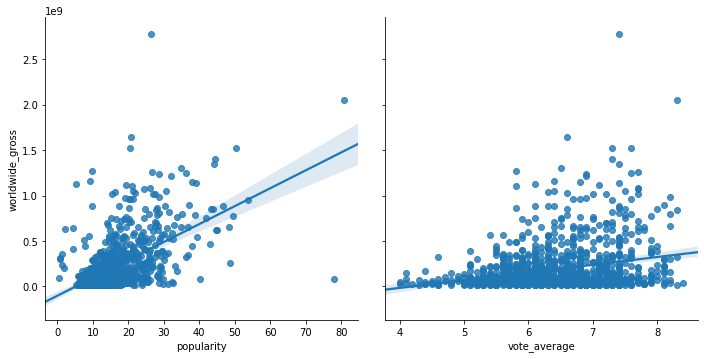

In [10]:
# create a pair plot with the relevant data
sns.pairplot(movie_financials_and_popularity, y_vars=['worldwide_gross'],
             x_vars=['popularity', 'vote_average'], kind='reg', height=5)

# Question 2: Effect of different actors and directors on profitability

In [11]:
new_name_basics = name_basics[['nconst', 'primary_name', 'primary_profession']].copy()
#new_basic_title = title_basics[['tconst', 'primary_title']]
new_crew_title = title_crew[['tconst', 'directors', 'writers']].copy()
new_principals_title = title_principals[['tconst', 'nconst']].copy()
#new_ratings_title = title_ratings[['tconst', 'averagerating', 'numvotes']]
title_alias = alt_title_names[['title_id', 'title', 'region']].copy()

In [12]:
# change title id column name to standard name; drop any non-US versions of titles
title_alias.rename(columns={'title_id': 'tconst'})
title_alias.dropna(inplace=True)
drop_by_not_equal(title_alias, 'region', 'US')

,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US
...,...,...,...
331645,tt9310460,Coconut the Little Dragon 2 Into the Jungle,US
331654,tt9358044,Hail Satan?,US
331673,tt9562694,Alien Warfare,US
331686,tt9705860,Dusan Vukotic Croatian Oscar Winner,US


In [13]:
# drop all duplicated title names from budget dataframe
movie_budgets.drop_duplicates(subset='title', inplace=True)
movie_budgets['title'].value_counts()

Before Midnight       1
Heaven is for Real    1
Chicago Overcoat      1
C.H.U.D.              1
Soul Men              1
                     ..
Eden                  1
Foolish               1
Knocked Up            1
Beyond the Mat        1
An Ideal Husband      1
Name: title, Length: 5698, dtype: int64

In [14]:
# convert columns of money from objects to integers, create a column for a standardized profit value
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'worldwide_gross')
movie_budgets['profitability'] = movie_budgets['worldwide_gross']/movie_budgets['production_budget']

In [15]:
# combine the movie budgets and 
budgets_and_aliases = pd.merge(title_alias, movie_budgets, on='title')

In [16]:
# drop any movies that grossed less than $10M
drop_by_less_than_equal_to(budgets_and_aliases, 'worldwide_gross', 10000000)

In [17]:
# create a new dataframe with only relevant columns
gross_and_titles = budgets_and_aliases[['title_id', 'title', 'worldwide_gross', 'profitability']].copy()

The Return         9
Home               8
Redemption         7
Trapped            6
Freedom            6
                  ..
Kick-Ass           1
Waitress           1
The Post           1
The Other Woman    1
Coco               1
Name: title, Length: 1235, dtype: int64

In [18]:
# drop all duplicated movies and check that the function worked
gross_and_titles.drop_duplicates(subset='title', inplace=True)
gross_and_titles['title'].value_counts()

Evil Dead                1
Kong: Skull Island       1
Pacific Rim: Uprising    1
The 5th Wave             1
Anastasia                1
                        ..
People Like Us           1
Snitch                   1
Homefront                1
Freaks of Nature         1
Coco                     1
Name: title, Length: 1235, dtype: int64

In [45]:
# make sure the dataframes to merge have the same column name for merge point
title_crew.rename(columns={'tconst': 'title_id'}, inplace=True)
title_crew.dropna(inplace=True)
title_crew.groupby(by='title_id')
# merge crew info with main dataframe
crew_and_gross = pd.merge(title_crew, gross_and_titles, on='title_id')
crew_and_gross

,title_id,directors,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [46]:
# rename directors and nconst columns to the standard column name
crew_and_gross.rename(columns={'directors': 'nameconstant'}, inplace=True)
new_name_basics.rename(columns={'nconst': 'nameconstant'}, inplace=True)
# merge name basics into the main dataframe
crew_names_and_gross = pd.merge(crew_and_gross, new_name_basics, on='nameconstant')
crew_names_and_gross

,title_id,nameconstant,writers,title,worldwide_gross,profitability,primary_name,primary_profession
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001,Rod Lurie,"writer,director,producer"
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544,Taylor Hackford,"producer,director,writer"
2,tt1904996,nm0000431,"nm0572352,nm0922799",Parker,24405825.0,0.697309,Taylor Hackford,"producer,director,writer"
3,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068,Roger Michell,"director,producer,actor"
4,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957,Adam Shankman,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...
1092,tt1741273,nm0712753,"nm0712753,nm0002728,nm3160078",Secret in Their Eyes,16612072.0,0.830604,Billy Ray,"writer,director,producer"
1093,tt2467046,nm0002184,"nm0420874,nm0481542,nm0482510,nm1146036",Left Behind,41382841.0,2.299047,Vic Armstrong,"stunts,assistant_director,actor"
1094,tt3148952,nm0369442,"nm0369442,nm2789152,nm2319441,nm2497348",The Circle,27147349.0,1.508186,Stefan Haupt,"director,writer,producer"
1095,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN,Kirk Loudon,"writer,director,editor"


In [47]:
# group new dataframe by director's name and drop any rows with na values
profitability_by_director = crew_names_and_gross.groupby(by='primary_name').mean()
profitability_by_director.dropna(inplace=True)

In [49]:
# create series of counts of movies made by each director
number_of_movies_by_director = crew_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_director.dropna(inplace=True)
# add number of movies series to the main dataframe
profitability_by_director['num_of_movies'] = number_of_movies_by_director

In [50]:
# exclude any director to make less than 2 movies in dataframe to avoid outliers and less predictable performances
multi_movie_directors = profitability_by_director.loc[profitability_by_director['num_of_movies'] >= 2].copy()
multi_movie_directors.sort_values(by='profitability', ascending=False, inplace=True)
# make the director column names more readable
clean_director_columns(multi_movie_directors)

,Director,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Sam Raimi,2.571265e+08,49.013898,2
1,Ryan Coogler,6.913817e+08,32.124904,2
2,James Gray,2.579304e+08,12.019347,3
3,Lee Daniels,2.067881e+08,9.029198,2
4,David Frankel,3.275505e+08,9.012066,2
...,...,...,...,...
189,Robert Luketic,4.318747e+07,0.762678,2
190,Rob Reiner,1.451371e+07,0.762361,2
191,Wes Craven,2.542130e+07,0.758725,2
192,Paul W.S. Anderson,2.453416e+07,0.446459,2


In [51]:
# create a dataframe of the 20 directors with the highest average profitability
top_multi_movie_directors = multi_movie_directors.iloc[0:20]

,Director,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Sam Raimi,2.571265e+08,49.013898,2
1,Ryan Coogler,6.913817e+08,32.124904,2
2,James Gray,2.579304e+08,12.019347,3
3,Lee Daniels,2.067881e+08,9.029198,2
4,David Frankel,3.275505e+08,9.012066,2
5,Spike Lee,2.276117e+07,8.360006,2
6,Bill Condon,7.361599e+08,8.197399,2
7,David Wain,6.088449e+07,7.862978,2
8,Gregory Plotkin,4.291844e+07,7.503885,2
9,Catherine Hardwicke,3.625032e+07,7.127644,2


Text(0.5, 1.0, 'Director vs Average Profit')

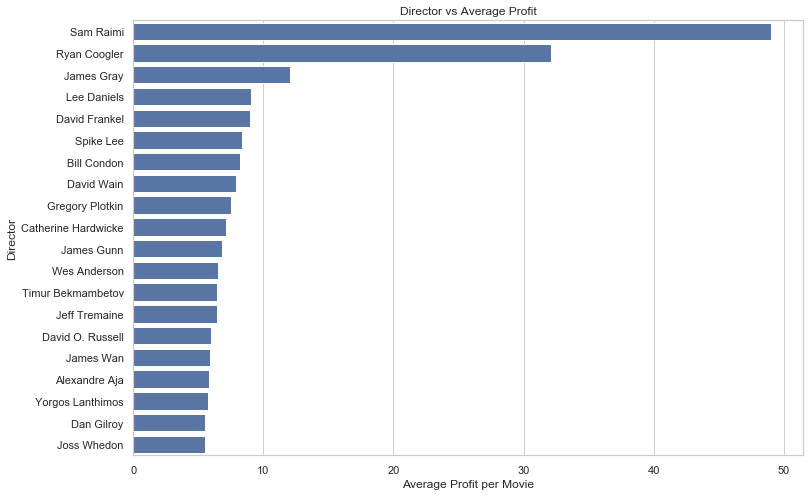

In [62]:
# make a bar graph to easily display the most profitable directors and how profitable they are on average
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Director', x='Average Profit per Movie', data=top_multi_movie_directors, color='b')
plt.title('Director vs Average Profit')

In [63]:
# print descriptive information on the overall list of directors profitability and worldwide gross
multi_movie_directors['Average Worldwide Box Office'] = multi_movie_directors['Average Worldwide Box Office'].astype('int64').copy()
multi_movie_directors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,1.940000e+02,194.000000,194.000000
mean,2.107219e+08,3.480135,2.530928
std,2.164023e+08,4.274090,0.917065
min,1.055142e+07,0.117238,2.000000
25%,5.962061e+07,1.911900,2.000000
50%,1.394859e+08,2.647723,2.000000
75%,2.734396e+08,3.809872,3.000000
max,1.460475e+09,49.013898,7.000000


Text(0.5, 1.0, 'Profit per Movie for Directors')

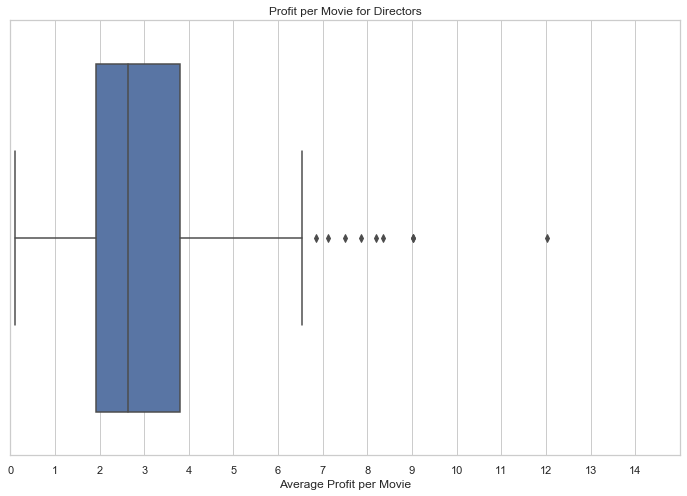

In [64]:
# create a bargraph to visualize the table printed above
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
ax = sns.boxplot(x=multi_movie_directors['Average Profit per Movie'])
plt.xlim(right=15, left=0)
plt.xticks(range(0,15))
plt.title('Profit per Movie for Directors')

## Actors

In [66]:
# set title principals column names to the standard names
new_principals_title.rename(columns={'tconst': 'title_id', 'nconst': 'nameconstant'}, inplace=True)
new_principals_title.dropna(inplace=True)

In [32]:
# merge title principals with the main dataframe, then merge with name basics dataframe
principals_and_gross = pd.merge(new_principals_title, gross_and_titles, on='title_id')
principal_names_and_gross = pd.merge(principals_and_gross, new_name_basics, on='nameconstant')

In [67]:
# set primary profession column to a string and filter out anyone who is not an actor or actress
principal_names_and_gross['primary_profession'].astype('str')
actor_names_and_gross = principal_names_and_gross.loc[(principal_names_and_gross['primary_profession'].str.contains(pat='actor'))
                                                      | (principal_names_and_gross['primary_profession'].str.contains(pat='actress'))].copy()

In [68]:
# sort the dataframe by actor's name and drop any na values
profitability_by_actor = actor_names_and_gross.groupby(by='primary_name').mean()
profitability_by_actor.dropna(inplace=True)

In [69]:
# create series of counts of movies made by each director
number_of_movies_by_actor = actor_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_actor.dropna(inplace=True)
# merge movie count series with main dataframe
profitability_by_actor['num_of_movies'] = number_of_movies_by_actor

In [70]:
# remove any actors appearing in less than 3 movies to exclude less predictable data points
# and sort by profitability
multi_movie_actors = profitability_by_actor.loc[(profitability_by_actor['num_of_movies'] >= 3)].copy()
multi_movie_actors.sort_values(by='profitability', ascending=False, inplace=True)
# set the column names to something more readable
clean_actor_columns(multi_movie_actors)

,Actor,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Dan Stevens,7.443914e+08,26.595277,3
1,Michelle Williams,1.431295e+08,21.091803,5
2,Rachel Weisz,1.402361e+08,18.631898,6
3,Octavia Spencer,9.093804e+07,17.719846,4
4,Dermot Mulroney,1.182542e+08,15.772292,3
...,...,...,...,...
552,Eric Bana,3.462937e+07,0.990169,3
553,Ron Perlman,1.668403e+08,0.970240,4
554,Andrew Macdonald,2.253992e+07,0.903110,3
555,Abbie Cornish,7.301534e+07,0.860702,4


In [71]:
# create a dataframe of the top 20 actors by profitability
top_multi_movie_actors = multi_movie_actors.iloc[0:20].copy()

Text(0.5, 1.0, 'Actor vs Average Profit')

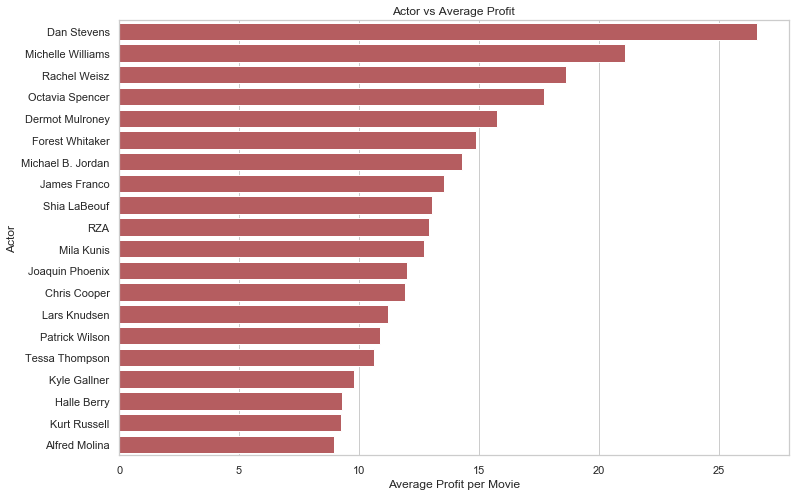

In [72]:
# create a barplot of the top 20 actors by profitability
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Actor', x='Average Profit per Movie', data=top_multi_movie_actors, color='r')
plt.title('Actor vs Average Profit')

In [73]:
# print a table of basic information for the data set of actors
multi_movie_actors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,5.570000e+02,557.000000,557.000000
mean,2.220497e+08,3.613492,4.820467
std,1.716674e+08,2.552801,2.479429
min,1.591161e+07,0.610757,3.000000
25%,9.523055e+07,2.284559,3.000000
50%,1.795922e+08,2.971061,4.000000
75%,2.899794e+08,4.007731,6.000000
max,1.031005e+09,26.595277,17.000000


Text(0.5, 1.0, 'Profit per Movie for Actors')

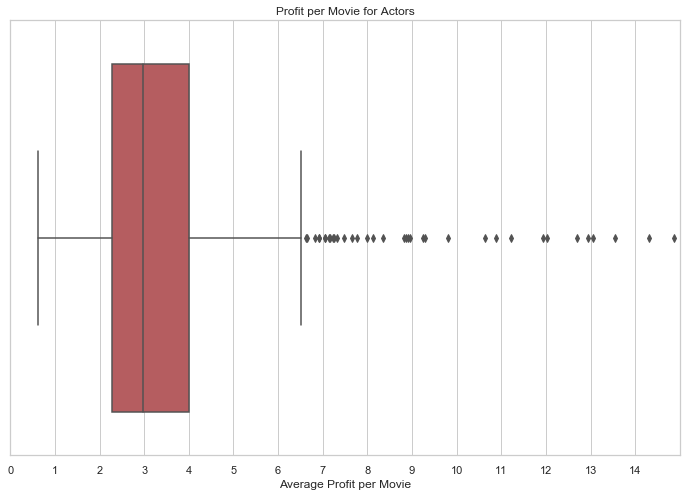

In [74]:
# create a boxplot to easily visualize the table printed above
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
ax = sns.boxplot(x=multi_movie_actors['Average Profit per Movie'], color='r')
plt.xlim(right=15, left=0)
plt.xticks(range(0,15))
plt.title('Profit per Movie for Actors')